In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [26]:
df = pd.read_csv('Student_Performance.csv', usecols=['Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced','Performance Index'])

In [27]:
le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])


In [28]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [29]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [30]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

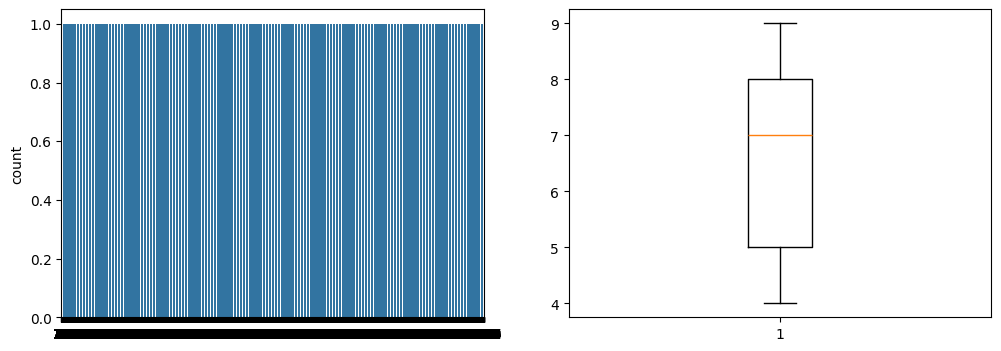

In [31]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['Sleep Hours'])

f.add_subplot(1,2,2)
plt.boxplot(df['Sleep Hours'])
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

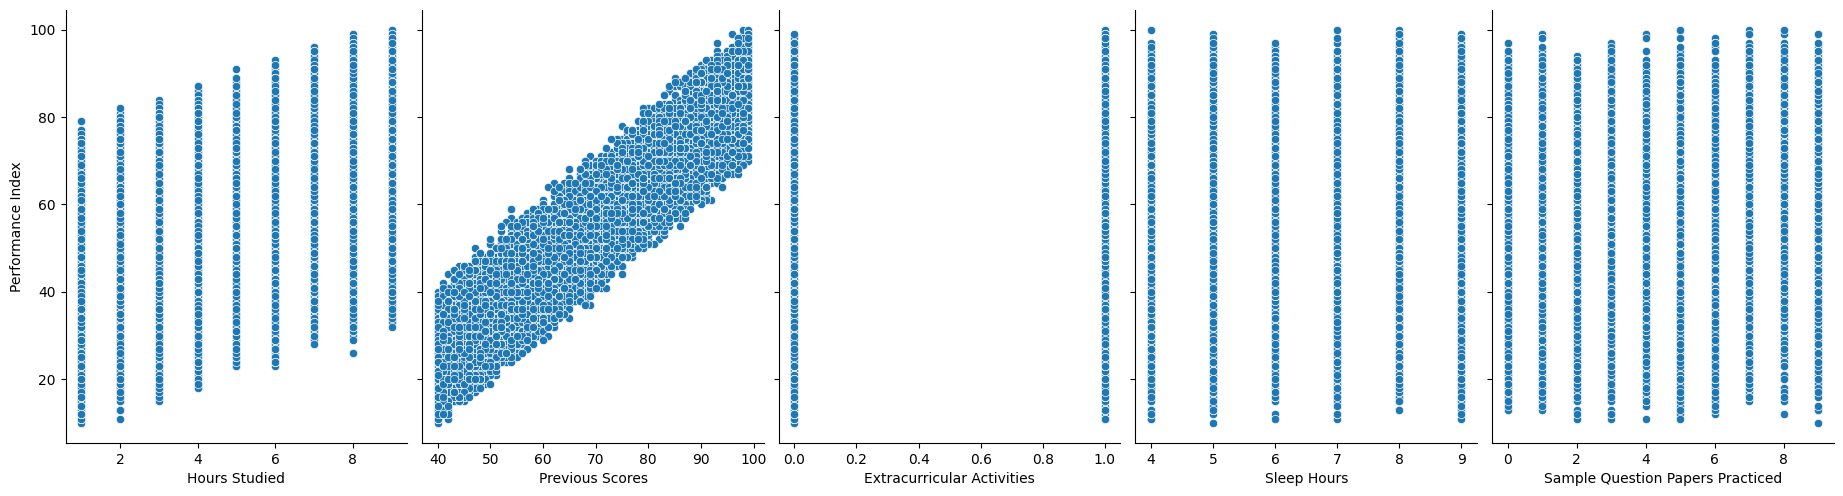

In [32]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced'], y_vars=['Performance Index'], size=5, aspect=0.75)
plt.show()

In [33]:
x = df.drop(columns='Performance Index')
y = df['Performance Index']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 5)
(8000,)
(2000, 5)
(2000,)


In [36]:
lin_reg = LinearRegression()

In [37]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [38]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[2.85517174 1.01890567 0.5934373  0.49136956 0.19551298]
-34.1643540808826


In [39]:
coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,Hours Studied,2.855172
1,Previous Scores,1.018906
2,Extracurricular Activities,0.593437
3,Sleep Hours,0.491370
4,Sample Question Papers Practiced,0.195513


In [40]:
y_pred = lin_reg.predict(x_test)

In [41]:
lin_reg.score(x_test, y_test)

0.9887587791707516

In [44]:
#Study hours = 10
#previous score = 87
#extra activ = 0
#Sleep hours = 7
#sample test = 3

lin_reg.predict([[10,87,0,7,3]])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([87.05828212])